In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df =  pd.read_csv("/content/Used_Bikes.csv")
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [50]:
df.duplicated().sum()

np.int64(25324)

In [51]:
df.drop_duplicates(inplace = True)

In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
cat_col =  df.select_dtypes(include = "O")
cat_col.head()

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha


In [54]:
num_col = df.select_dtypes(exclude ="O")
num_col.head()

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


In [55]:
cat_col = cat_col.drop(["bike_name","city"],axis = 1)
cat_col.head()

,owner,brand
0,First Owner,TVS
1,First Owner,Royal Enfield
2,First Owner,Triumph
3,First Owner,TVS
4,First Owner,Yamaha


In [56]:
##feature selection --  imp step
df.drop(["bike_name","city"],axis = 1,inplace = True)

In [57]:
##encoding -- char --- num
#lable encoding
pd.get_dummies(cat_col).astype(int).head()


,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [58]:
##label encoding
cat_col.head()
cat_col["owner"].value_counts()

,count
owner,
First Owner,6642
Second Owner,588
Third Owner,84
Fourth Owner Or More,10


In [59]:
dt = {
    "First Owner":1,
    "Second Owner" :2,
    "Third Owner"  :3,
    "Fourth Owner Or More" : 4
    }

In [60]:
cat_col["owner"] = cat_col["owner"].map(dt)
cat_col.head()

,owner,brand
0,1,TVS
1,1,Royal Enfield
2,1,Triumph
3,1,TVS
4,1,Yamaha


In [61]:
cat_col["brand"].value_counts()

,count
brand,
Bajaj,2081
Royal Enfield,1346
Hero,1142
Honda,676
Yamaha,651
TVS,481
KTM,375
Suzuki,203
Harley-Davidson,91


In [62]:
{i : key for key,i in enumerate(list(cat_col["brand"].unique()))}

{'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [63]:
dt1 = {'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}


In [64]:
cat_col["brand"] = cat_col["brand"].map(dt1)
cat_col.head()

,owner,brand
0,1,0
1,1,1
2,1,2
3,1,0
4,1,3


In [65]:
final_df = pd.concat([cat_col,num_col],axis=1)
final_df.head()

,owner,brand,price,kms_driven,age,power
0,1,0,35000.0,17654.0,3.0,110.0
1,1,1,119900.0,11000.0,4.0,350.0
2,1,2,600000.0,110.0,8.0,675.0
3,1,0,65000.0,16329.0,4.0,180.0
4,1,3,80000.0,10000.0,3.0,150.0


In [66]:
matrix = final_df.corr()
matrix.head()

,owner,brand,price,kms_driven,age,power
owner,1.000000,0.005844,-0.005188,0.062612,0.203151,0.043746
brand,0.005844,1.000000,0.288409,-0.036161,-0.030263,0.068647
price,-0.005188,0.288409,1.000000,-0.199951,-0.248752,0.807641
kms_driven,0.062612,-0.036161,-0.199951,1.000000,0.367518,-0.168295
age,0.203151,-0.030263,-0.248752,0.367518,1.000000,-0.164211


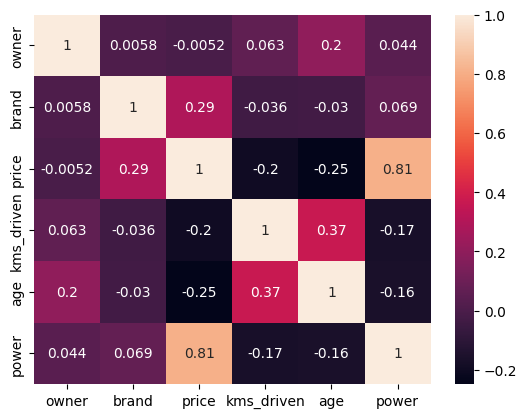

In [67]:
sns.heatmap(matrix,annot=True)
plt.show()

In [68]:
y = final_df["price"]
x = final_df.drop("price",axis = 1)
x
y

,price
0,35000.0
1,119900.0
2,600000.0
3,65000.0
4,80000.0
...,...
9362,25000.0
9369,35000.0
9370,450000.0
9371,139000.0


In [69]:

##scikit -- learn//scikit
#pip install scikit-learn
##train and testing
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train ,y_test = train_test_split(x ,y,test_size= 0.2)
random_state = 42

In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [72]:
y_pred = model.predict(x_test)
y_pred

array([84299.08531018, 29780.43101061, 58877.81203953, ...,
       30731.08725196, 21808.17907194, 13187.72050294])

In [73]:
# df1 = pd.DataFrame({"Actual":y_test,"predicted":y_pred})
# df1.head()

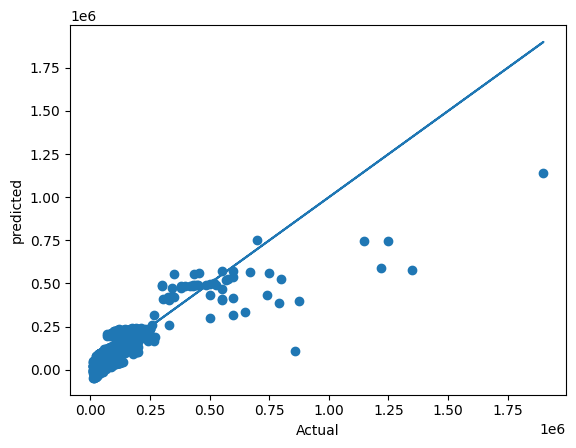

In [74]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.plot(y_test,y_test,)

In [75]:
df = pd.read_csv("/content/cust_satisfaction.csv")
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [76]:
df.duplicated().sum()

np.int64(172)

In [77]:
df.drop_duplicates(inplace = True)

In [78]:
df.duplicated().sum()

np.int64(0)

In [79]:
df.isnull().sum()
df.dropna(inplace=True)

In [80]:
loyal_customer=df[df["Customer Type"]=="Loyal Customer"]
disloyal_customer=df[df["Customer Type"]=="disloyal Customer"]

In [81]:
df["Customer Type"].value_counts()

,count
Customer Type,
Loyal Customer,84517
disloyal Customer,18905


In [82]:
num_col=df.select_dtypes(exclude="O")
num_col.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,5,4,5,25,18.0
1,25,235,1,3,1,1,6.0
2,26,1142,5,4,5,0,0.0
3,25,562,2,3,2,11,9.0
4,61,214,3,4,3,0,0.0


In [83]:
cat_col=df.select_dtypes("object")
cat_col.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


In [84]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
ohe=OneHotEncoder(drop="if_binary")
cat_col_encoded=ohe.fit_transform(cat_col).toarray()
cat_col_encoded

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [85]:
pd.get_dummies(cat_col)

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,False,True,True,False,False,True,False,False,True,True,False
1,False,True,False,True,True,False,True,False,False,True,False
2,True,False,True,False,True,False,True,False,False,False,True
3,True,False,True,False,True,False,True,False,False,True,False
4,False,True,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
103899,True,False,False,True,True,False,False,True,False,True,False
103900,False,True,True,False,True,False,True,False,False,False,True
103901,False,True,False,True,True,False,True,False,False,True,False
103902,True,False,False,True,True,False,False,True,False,True,False


In [86]:
column_name=list(ohe.get_feature_names_out())
column_name

['Gender_Male',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'satisfaction_satisfied']

In [87]:
one_hot = pd.DataFrame(cat_col_encoded,columns=column_name)
one_hot.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [88]:
one_hot = one_hot.reset_index(drop=True)
num_col = num_col.reset_index(drop=True)
final_df = pd.concat([one_hot,num_col],axis=1)
final_df.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,13,460,5,4,5,25,18.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,25,235,1,3,1,1,6.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,26,1142,5,4,5,0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25,562,2,3,2,11,9.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,61,214,3,4,3,0,0.0


In [89]:
final=df.to_csv("cleaned_cust_satisfaction.csv",index=False)

In [90]:
x = final_df.drop("Customer Type_disloyal Customer",axis = 1)
y = final_df[["Customer Type_disloyal Customer"]]


In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
random_state=42

In [92]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
model.score(x_test, y_test)

0.8968334541938603

In [94]:
model.score(x_train, y_train)

0.8937960042060988

In [95]:
pred = model.predict(x_test)
y_test["prediction"]=pred
y_test

,Customer Type_disloyal Customer,prediction
58133,0.0,0.0
27180,0.0,0.0
40111,0.0,0.0
26117,1.0,1.0
51944,0.0,0.0
...,...,...
5041,0.0,0.0
60604,0.0,0.0
60573,0.0,0.0
8105,0.0,0.0


In [96]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop="first", sparse_output=False) # Use drop="first" to avoid multicollinearity
cat_col_encoded = ohe.fit_transform(cat_col)

In [97]:
column_name = list(ohe.get_feature_names_out(cat_col.columns))
one_hot = pd.DataFrame(cat_col_encoded, columns=column_name)
one_hot.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0


In [98]:
# Reset index of num_col before concatenating
num_col = num_col.reset_index(drop=True)
final_df = pd.concat([one_hot, num_col], axis=1)
final_df.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,1.0,0.0,1.0,0.0,13,460,5,4,5,25,18.0
1,1.0,1.0,0.0,0.0,0.0,0.0,25,235,1,3,1,1,6.0
2,0.0,0.0,0.0,0.0,0.0,1.0,26,1142,5,4,5,0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,25,562,2,3,2,11,9.0
4,1.0,0.0,0.0,0.0,0.0,1.0,61,214,3,4,3,0,0.0
